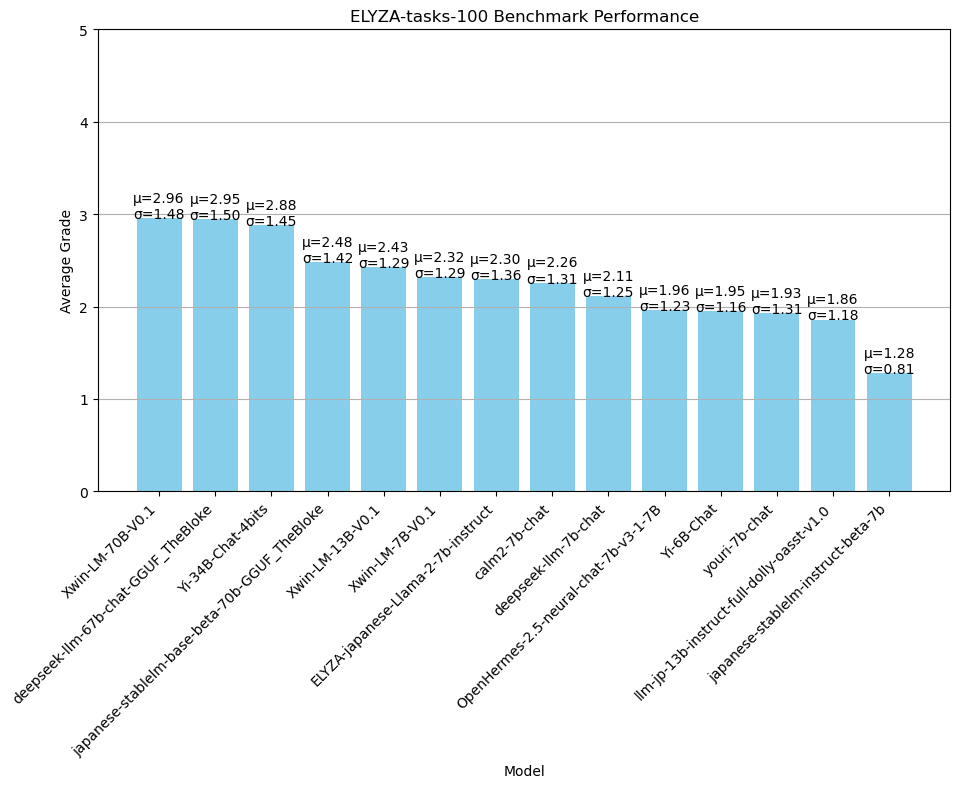

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Define the path to the directories containing result.jsonl files
base_path = Path("assets")
model_dirs = [
    base_path / "Xwin-LM" / "Xwin-LM-70B-V0.1",
    base_path / "deepseek" / "deepseek-llm-67b-chat-GGUF_TheBloke",
    base_path / "01-ai" / "Yi-34B-Chat-4bits",
    base_path / "stabilityai" / "japanese-stablelm-base-beta-70b-GGUF_TheBloke",
    base_path / "Xwin-LM" / "Xwin-LM-13B-V0.1",
    base_path / "Xwin-LM" / "Xwin-LM-7B-V0.1",
    base_path / "elyza" / "ELYZA-japanese-Llama-2-7b-instruct",
    base_path / "cyberagent" / "calm2-7b-chat",
    base_path / "deepseek-ai" / "deepseek-llm-7b-chat",
    base_path / "Weyaxi" / "OpenHermes-2.5-neural-chat-7b-v3-1-7B",
    base_path / "01-ai" / "Yi-6B-Chat",
    base_path / "rinna" / "youri-7b-chat",
    base_path / "llm-jp" / "llm-jp-13b-instruct-full-dolly-oasst-v1.0",
    base_path / "stabilityai" / "japanese-stablelm-instruct-beta-7b",
]

# Dictionary to hold the statistical data for each model
stats_data = {}

# Loop through each directory, read the result.jsonl file and calculate the statistics
for model_dir in model_dirs:
    # Construct the file path
    file_path = model_dir / "result.jsonl"

    # Read the file
    df = pd.read_json(file_path, lines=True)
    
    # Calculate statistics
    mean_grade = df['grade'].mean()
    std_dev = df['grade'].std()
    median_grade = df['grade'].median()
    min_grade = df['grade'].min()
    max_grade = df['grade'].max()
    count = df['grade'].count()

    # Extract the model name and store the statistics
    model_name = model_dir.parts[-1]
    stats_data[model_name] = [mean_grade, std_dev, median_grade, min_grade, max_grade, count]

# Creating a bar chart with additional statistical data
plt.figure(figsize=(11, 6))
for i, (model, stats) in enumerate(stats_data.items()):
    plt.bar(model, stats[0], capsize=5, color='skyblue')
    #plt.text(i, stats[0], f"μ={stats[0]:.2f}\nσ={stats[1]:.2f}\nMed={stats[2]:.2f}\nMin={stats[3]}\nMax={stats[4]}\nN={stats[5]}", ha='center')
    plt.text(i, stats[0], f"μ={stats[0]:.2f}\nσ={stats[1]:.2f}", ha='center')

plt.xlabel('Model')
plt.ylabel('Average Grade')
plt.title('ELYZA-tasks-100 Benchmark Performance')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)
plt.grid(axis="y")
plt.show()

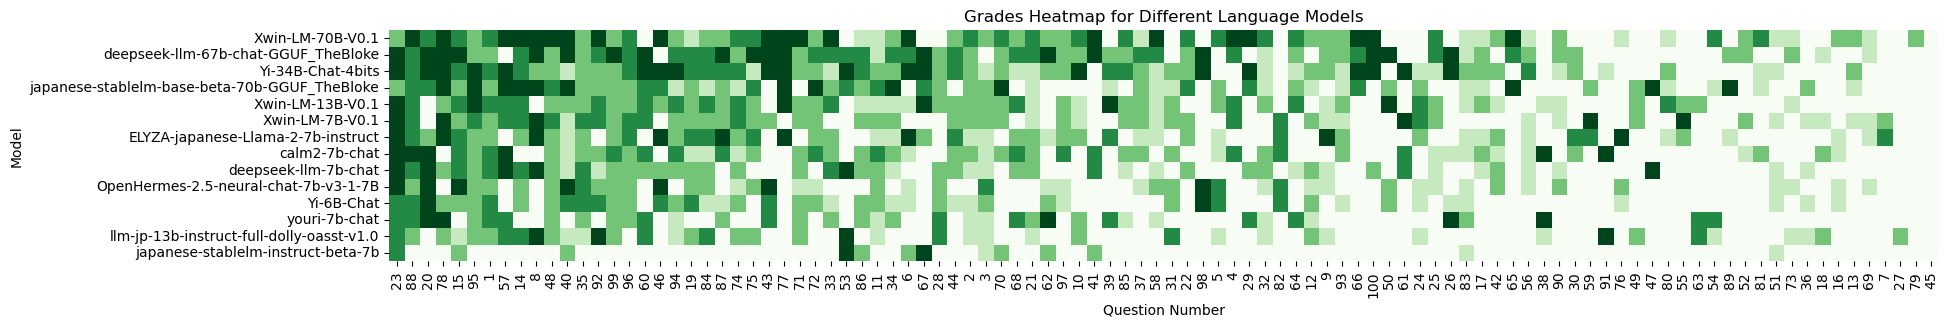

In [2]:
import seaborn as sns

# List to hold the DataFrames for each model
df_list = []

# Loop through each directory, read the result.jsonl file
for model_dir in model_dirs:
    file_path = model_dir / "result.jsonl"
    df = pd.read_json(file_path, lines=True)
    
    # Extract the model name
    model_name = model_dir.parts[-1]

    # Transpose the DataFrame so that each column is a question
    transposed = df['grade'].transpose()
    transposed.name = model_name

    # Add to the list
    df_list.append(transposed)

# Concatenate all the DataFrames
grades_df = pd.concat(df_list, axis=1)

# # Sort the DataFrame based on the grades of the first model in the list
# sort_model = "Yi-34B-Chat-4bits"
# grades_df = grades_df.sort_values(by=sort_model, axis=0, ascending=False)

# Set the model names as the column headers
grades_df.columns = [model_dir.parts[-1] for model_dir in model_dirs]

# Increment the question numbers by one to match the line number
grades_df.index = [i+1 for i in range(len(grades_df))]

# Transpose the DataFrame so that each row is a model and each column is a question
grades_df = grades_df.transpose()

# Calculate the average grade for each question across all models
# Sort the DataFrame based on these average grades
average_grades = grades_df.mean(axis=0)
grades_df = grades_df[average_grades.sort_values(ascending=False).index]

# Create the heatmap
plt.figure(figsize=(20, 3))
sns.heatmap(
    grades_df, annot=False, cmap='Greens', cbar=False, fmt=".1f"
)
plt.title("Grades Heatmap for Different Language Models")
plt.xlabel("Question Number")
plt.ylabel("Model")
plt.show()

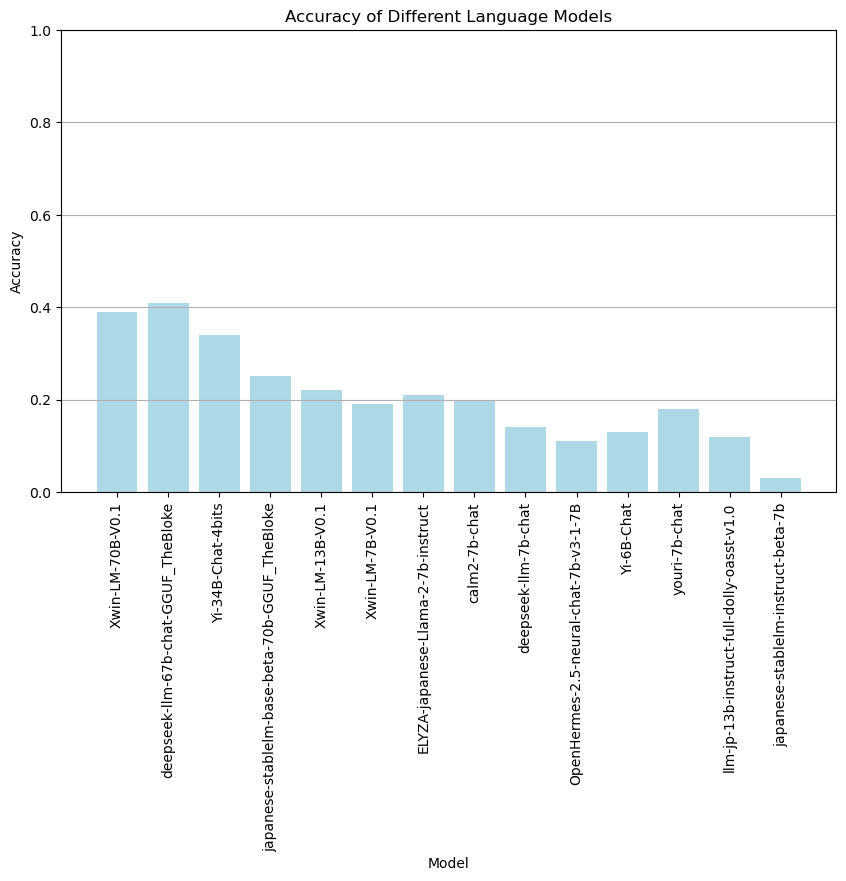

In [66]:
import matplotlib.pyplot as plt

# Calculate the number of grades greater than or equal to 4 for each model
grades_ge_4 = grades_df.transpose()>= 4

# Calculate the accuracy for each model
accuracy = grades_ge_4.sum() / len(grades_df.transpose())

# Calculate the accuracy for each model
accuracy = grades_ge_4.sum() / len(grades_df.transpose())

# Creating a bar chart for the accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracy.index, accuracy.values, color='lightblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Language Models')
plt.xticks(rotation=90, )
plt.ylim(0, 1)  # Since accuracy ranges from 0 to 1
plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Dictionary to hold the statistical data for each model
stats_data = {}

# Loop through each directory, read the result.jsonl file and calculate the statistics
for model_dir in model_dirs:
    # Construct the file path
    file_path = model_dir / "result.jsonl"

    # Read the file
    df = pd.read_json(file_path, lines=True)
    
    # Calculate statistics
    mean_grade = df['grade'].mean()

    # Extract the model name and store the statistics
    model_name = model_dir.parts[-1]
    stats_data[model_name] = {
        "mean": mean_grade,
    }

df_attrs = pd.DataFrame(stats_data).transpose()

# Additional information as a dictionary
additional_info = {
    "Xwin-LM-70B-V0.1": {
        "num_tokens_b": None, # ⚠️ Estimated
        "num_params_b": 70,
        "is_llama2": True,
    },
    "deepseek-llm-67b-chat-GGUF_TheBloke": {
        "num_tokens_b": 2_000,
        "num_params_b": 67,
        "is_llama2": False,
    },
    "Yi-34B-Chat-4bits": {
        "num_tokens_b": 3_000,
        "num_params_b": 34,
        "is_llama2": False,
    },
    "japanese-stablelm-base-beta-70b-GGUF_TheBloke": {
        "num_tokens_b": 100,
        "num_params_b": 70,
        "is_llama2": True,
    },
    "Xwin-LM-13B-V0.1": {
        "num_tokens_b": None, # ⚠️ Estimated
        "num_params_b": 13,
        "is_llama2": True,
    },
    "Xwin-LM-7B-V0.1": {
        "num_tokens_b": None, # ⚠️ Estimated
        "num_params_b": 7,
        "is_llama2": True,
    },
    "ELYZA-japanese-Llama-2-7b-instruct": {
        "num_tokens_b": 18,
        "num_params_b": 7,
        "is_llama2": True,
    },
    "calm2-7b-chat": {
        "num_tokens_b": 1_300,
        "num_params_b": 7,
        "is_llama2": False,
    },
    "deepseek-llm-7b-chat": {
        "num_tokens_b": 2_000,
        "num_params_b": 7,
        "is_llama2": False,
    },
    "OpenHermes-2.5-neural-chat-7b-v3-1-7B": {
        "num_tokens_b": None,
        "num_params_b": 7,
        "is_llama2": False,
    },
    "Yi-6B-Chat": {
        "num_tokens_b": 3_000,
        "num_params_b": 6,
        "is_llama2": False,
    },
    "youri-7b-chat": {
        "num_tokens_b": 40,
        "num_params_b": 7,
        "is_llama2": True,
    },
    "llm-jp-13b-instruct-full-dolly-oasst-v1.0": {
        "num_tokens_b": 300,
        "num_params_b": 13,
        "is_llama2": False,
    },
    "japanese-stablelm-instruct-beta-7b": {
        "num_tokens_b": 100,
        "num_params_b": 7,
        "is_llama2": True,
    },
}

# Convert the additional info to a DataFrame and merge it with df_attrs
additional_df = pd.DataFrame.from_dict(additional_info, orient='index')
df_attrs = df_attrs.merge(additional_df, left_index=True, right_index=True)
df_attrs

,mean,num_tokens_b,num_params_b,is_llama2
Xwin-LM-70B-V0.1,2.96,NaN,70,True
deepseek-llm-67b-chat-GGUF_TheBloke,2.95,2000.0,67,False
Yi-34B-Chat-4bits,2.88,3000.0,34,False
japanese-stablelm-base-beta-70b-GGUF_TheBloke,2.48,100.0,70,True
Xwin-LM-13B-V0.1,2.43,NaN,13,True
Xwin-LM-7B-V0.1,2.32,NaN,7,True
ELYZA-japanese-Llama-2-7b-instruct,2.30,18.0,7,True
calm2-7b-chat,2.26,1300.0,7,False
deepseek-llm-7b-chat,2.11,2000.0,7,False
OpenHermes-2.5-neural-chat-7b-v3-1-7B,1.96,NaN,7,False


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


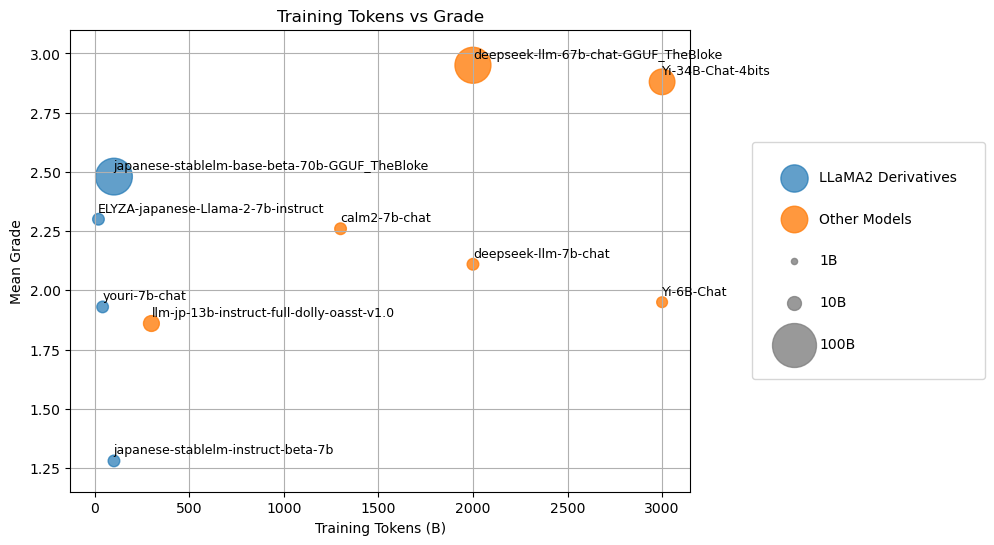

In [42]:
%matplotlib inline
plt.figure(figsize=(8, 6))

# Scatter plot for models that are derivatives of LLaMA2
llama2_models = df_attrs[df_attrs['is_llama2'] == True]
llama2_scatter = plt.scatter(llama2_models['num_tokens_b'] + 2, llama2_models['mean'], s=llama2_models["num_params_b"] * 10, label='LLaMA2 Derivatives', alpha=0.7)

# Scatter plot for other models
other_models = df_attrs[df_attrs['is_llama2'] == False]
other_scatter = plt.scatter(other_models['num_tokens_b'], other_models['mean'], s=other_models["num_params_b"] * 10, label='Other Models', alpha=0.8)

# Annotate each data point with the model name
for model_name, row in df_attrs.iterrows():
    plt.text(row['num_tokens_b'], row['mean'] + 0.03, model_name, fontsize=9, ha='left')

plt.title('Training Tokens vs Grade')
plt.xlabel('Training Tokens (B)')
plt.ylabel('Mean Grade')
plt.ylim(1.15, 3.1)
plt.grid()

# Legend for model types
plt.legend(handles=[llama2_scatter, other_scatter], labels=['LLaMA2 Derivatives', 'Other Models'], loc='center left', title='Model Types')

# Optional: Legend for marker sizes
# Example sizes and their labels
sizes = [20, 100, 1000]
labels = ['1B', '10B', '100B']

# Create dummy scatter plots for legend
for size, label in zip(sizes, labels):
    plt.scatter([], [], s=size, label=label, color='grey', alpha=0.8)

plt.legend(bbox_to_anchor=(1.1, 0.5), loc="center left", borderaxespad=0, labelspacing=2, borderpad=2)

# Legend: not working properly (marker sizes larger than expected)
# handles, labels = scatter_plot.legend_elements(prop="sizes", alpha=0.6, num=4, func=lambda x: x*10)
# labels = [1, 10, 100]
# legend = plt.legend(handles, labels, loc="upper left", title="Sizes")

plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


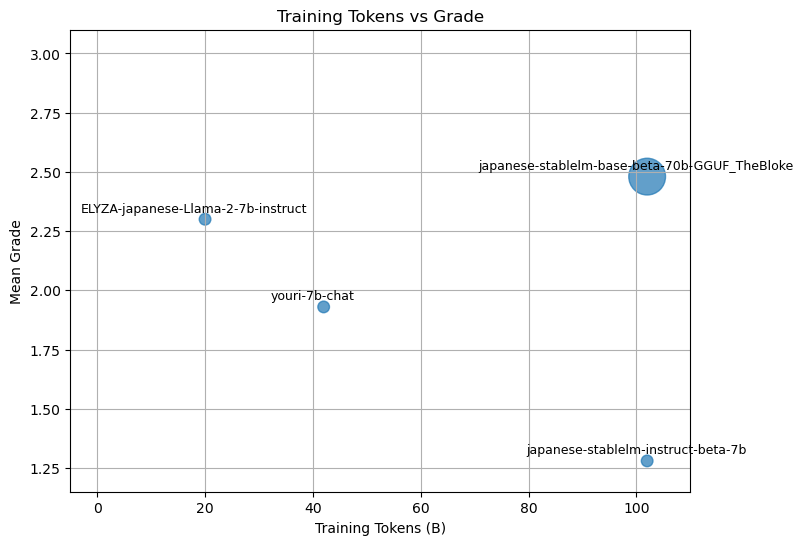

In [69]:
%matplotlib inline
plt.figure(figsize=(8, 6))

# Scatter plot for models that are derivatives of LLaMA2
llama2_models = df_attrs[df_attrs['is_llama2'] == True]
llama2_scatter = plt.scatter(llama2_models['num_tokens_b'] + 2, llama2_models['mean'], s=llama2_models["num_params_b"] * 10, label='LLaMA2 Derivatives', alpha=0.7)

# Annotate each data point with the model name
for model_name, row in df_attrs[df_attrs['is_llama2'] == True].iterrows():
    plt.text(row['num_tokens_b'], row['mean'] + 0.03, model_name, fontsize=9, ha='center')

# Optional: Legend for marker sizes
# Example sizes and their labels
sizes = [20, 100, 1000]
labels = ['1B', '10B', '100B']

# Create dummy scatter plots for legend
for size, label in zip(sizes, labels):
    plt.scatter([], [], s=size, label=label, color='grey', alpha=0.8)

plt.title('Training Tokens vs Grade')
plt.xlabel('Training Tokens (B)')
plt.ylabel('Mean Grade')
plt.xlim(-5, 110)
plt.ylim(1.15, 3.1)
plt.grid()

plt.show()

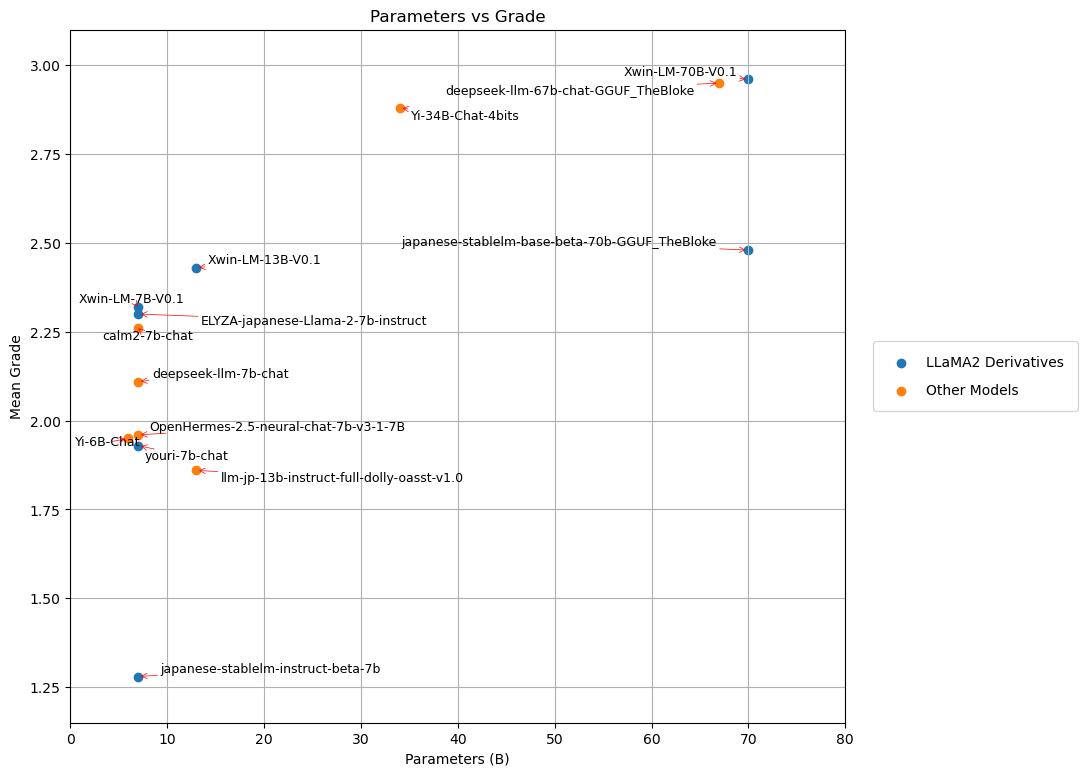

In [56]:
!pip install adjustText

import matplotlib.pyplot as plt
from adjustText import adjust_text

# Your existing code for plotting
plt.figure(figsize=(10, 9))

# Scatter plot for models that are derivatives of LLaMA2
llama2_models = df_attrs[df_attrs['is_llama2'] == True]
llama2_scatter = plt.scatter(llama2_models['num_params_b'], llama2_models['mean'], label='LLaMA2 Derivatives')

# Scatter plot for other models
other_models = df_attrs[df_attrs['is_llama2'] == False]
other_scatter = plt.scatter(other_models['num_params_b'], other_models['mean'], label='Other Models')

# Collecting text objects for adjust_text
texts = []
for model_name, row in df_attrs.iterrows():
    texts.append(plt.text(row['num_params_b'], row['mean'], model_name, fontsize=9, ha='left'))

# Legend for model types
plt.legend(handles=[llama2_scatter, other_scatter], labels=['LLaMA2 Derivatives', 'Other Models'], loc='center right', title='Model Types')
plt.legend(bbox_to_anchor=(1.3, 0.5), loc="center right", borderaxespad=0, labelspacing=1, borderpad=1)

plt.title('Parameters vs Grade')
plt.xlabel('Parameters (B)')
plt.ylabel('Mean Grade')
plt.xlim(0, 80)
plt.ylim(1.15, 3.1)
plt.grid()

# Using adjust_text to avoid overlapping
adjust_text(texts, expand_points=(1.2, 1.2), arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.show()

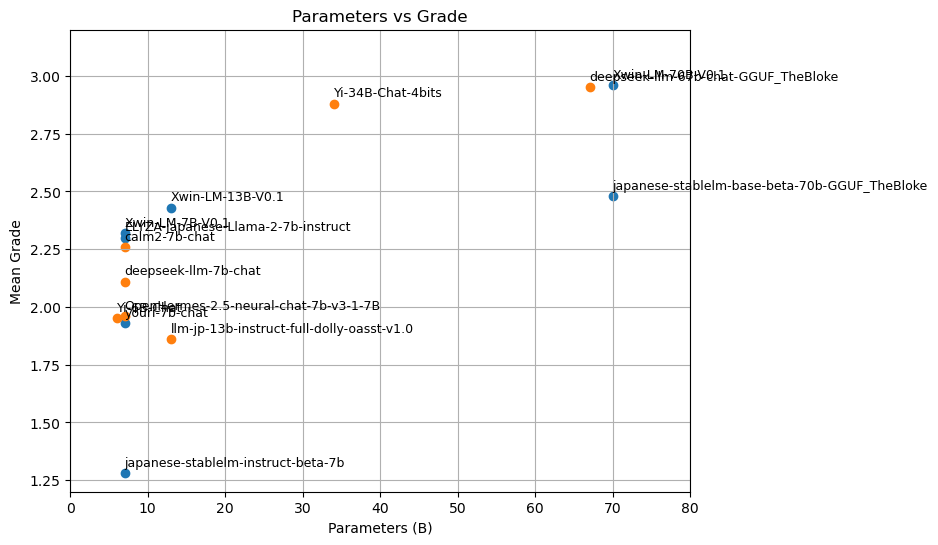

In [20]:
!pip install adjustText

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot for models that are derivatives of LLaMA2
llama2_models = df_attrs[df_attrs['is_llama2'] == True]
# plt.scatter(llama2_models['num_params_b'], llama2_models['mean'], s=llama2_models["num_tokens_b"] / 5, label='LLaMA2 Derivatives')
plt.scatter(llama2_models['num_params_b'], llama2_models['mean'], label='LLaMA2 Derivatives')

# Scatter plot for other models
other_models = df_attrs[df_attrs['is_llama2'] == False]
# plt.scatter(other_models['num_params_b'], other_models['mean'], s=other_models["num_tokens_b"] / 5, label='Other Models')
plt.scatter(other_models['num_params_b'], other_models['mean'], label='Other Models')


# Annotate each data point with the model name
for model_name, row in df_attrs.iterrows():
    plt.text(row['num_params_b'], row['mean'] + 0.03, model_name, fontsize=9, ha='left')

plt.title('Parameters vs Grade')
plt.xlabel('Parameters (B)')
plt.ylabel('Mean Grade')
# plt.xscale('log')  # Log scale for better visualization if numbers vary widely
plt.yscale('linear')
plt.xlim(0, 80)
plt.ylim(1.2, 3.2)
plt.grid()
plt.show()

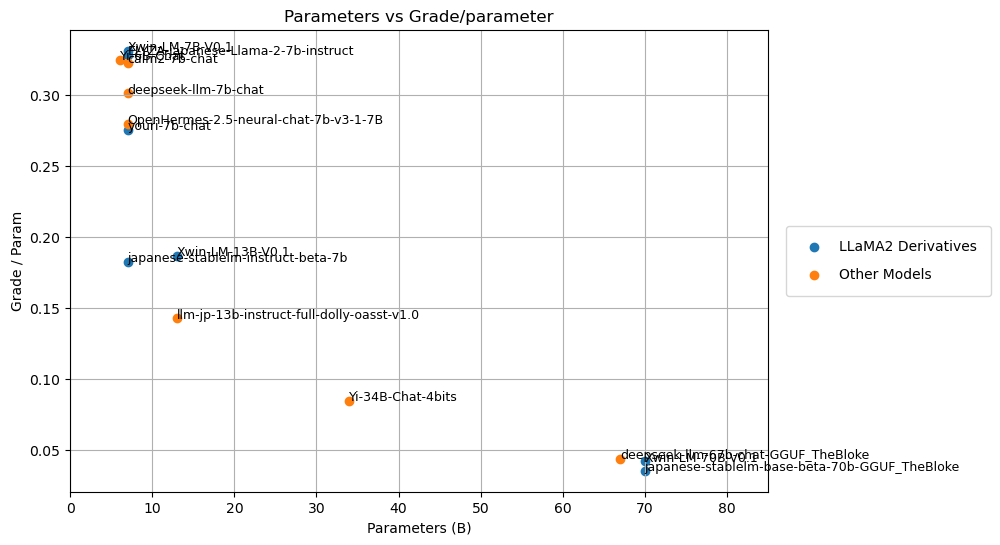

In [60]:
# Plotting
plt.figure(figsize=(9, 6))

# Scatter plot for models that are derivatives of LLaMA2
llama2_models = df_attrs[df_attrs['is_llama2'] == True]
llama2_scatter = plt.scatter(
    llama2_models['num_params_b'],
    llama2_models["mean"] / llama2_models["num_params_b"],
    # s=llama2_models["num_tokens_b"] / 5,
    label='LLaMA2 Derivatives'
)

# Scatter plot for other models
other_models = df_attrs[df_attrs['is_llama2'] == False]
other_scatter = plt.scatter(
    other_models['num_params_b'],
    other_models["mean"] / other_models["num_params_b"],
    # s=other_models["num_tokens_b"] / 5,
    label='Other Models'
)

# Annotate each data point with the model name
for model_name, row in df_attrs.iterrows():
    plt.text(
        row['num_params_b'],
        row["mean"] / row["num_params_b"],
        model_name,
        fontsize=9,
        ha='left'
    )

plt.title('Parameters vs Grade/parameter')
plt.xlabel('Parameters (B)')
plt.ylabel('Grade / Param')
# plt.xscale('log')  # Log scale for better visualization if numbers vary widely

# Legend for model types
plt.legend(handles=[llama2_scatter, other_scatter], labels=['LLaMA2 Derivatives', 'Other Models'], loc='center right', title='Model Types')
plt.legend(bbox_to_anchor=(1.32, 0.5), loc="center right", borderaxespad=0, labelspacing=1, borderpad=1)

plt.yscale('linear')
plt.xlim(0, 85)
plt.grid()
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


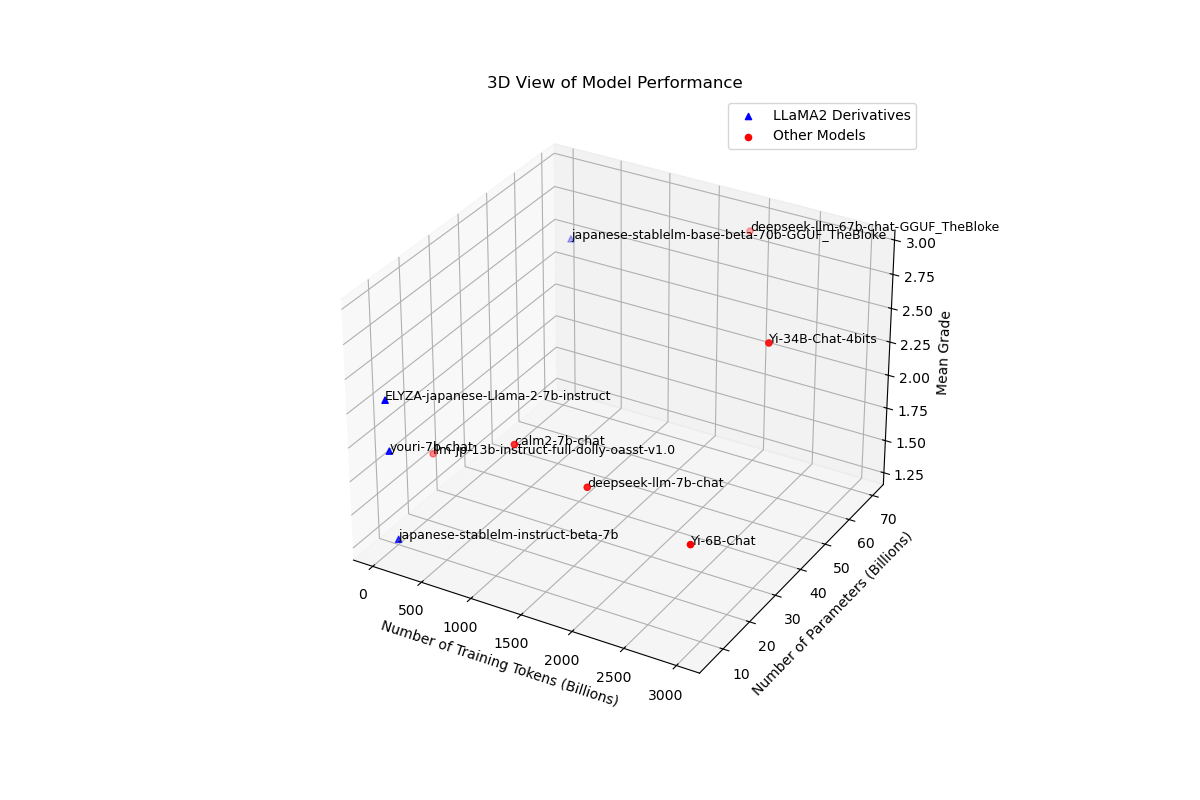

In [19]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for models that are derivatives of LLaMA2
llama2_models = df_attrs[df_attrs['is_llama2'] == True]
scatter1 = ax.scatter(llama2_models['num_tokens_b'], llama2_models['num_params_b'], llama2_models['mean'], c='blue', marker='^', label='LLaMA2 Derivatives')

# Scatter plot for other models
other_models = df_attrs[df_attrs['is_llama2'] == False]
scatter2 = ax.scatter(other_models['num_tokens_b'], other_models['num_params_b'], other_models['mean'], c='red', marker='o', label='Other Models')

# Annotate each data point with the model name
for model_name, row in df_attrs.iterrows():
    ax.text(row['num_tokens_b'], row['num_params_b'], row['mean'], model_name, fontsize=9, color='black')

# Setting the axes labels
ax.set_title('3D View of Model Performance')
ax.legend()

ax.set_xlabel('Number of Training Tokens (Billions)')
ax.set_ylabel('Number of Parameters (Billions)')
ax.set_zlabel('Mean Grade')

# num_tokens in log scale
# # https://stackoverflow.com/a/67774238/13301046
# import matplotlib.ticker as mticker

# # My axis should display 10⁻¹ but you can switch to e-notation 1.00e+01
# def log_tick_formatter(val, pos=None):
#     return f"$10^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator

# ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
# ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show()